In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "/home/edi/data/data_000637.txt"
N = 1310720
#N = 10_000
data = pd.read_csv(file,nrows=N)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


In [3]:
#EX2: FINDING X
x = data.groupby('ORBIT_CNT').max()#['BX_COUNTER']
x

,HEAD,FPGA,TDC_CHANNEL,BX_COUNTER,TDC_MEAS
ORBIT_CNT,,,,,
3869200167,1,1,139,3187,28
3869200168,1,1,139,3538,29
3869200169,1,1,139,2766,29
3869200170,1,1,139,3377,29
3869200171,1,1,139,3542,29
...,...,...,...,...,...
3869211167,1,1,139,3553,29
3869211168,1,1,139,3556,29
3869211169,1,1,139,3498,29


In [4]:
count = x['BX_COUNTER'].mean()*25
print('average BX = {:.1f} ns'.format(count))
bx_max = x['BX_COUNTER'].max()

#EX_3: TOTAL COUNT
tot = x['BX_COUNTER'].sum()*25/1e9
print('Total data taking time = {:.1f} s'.format(tot))

average BX = 82004.5 ns
Total data taking time = 0.9 s


In [5]:
#4: WRITING ABSOLUTE TIME

h = (data['ORBIT_CNT']-data['ORBIT_CNT'][0])*bx_max
m = data['BX_COUNTER']
s = data['TDC_MEAS']*25/30

t = pd.Series( s + (m + h)*25, name='TIME')
#pd.concat([data,t], axis=1)
data['TIME']=t
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,5.937167e+04
1,1,0,124,3869200167,2374,27,5.937250e+04
2,1,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,1,0,64,3869200167,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.802004e+08
1310716,1,1,4,3869211171,763,11,9.802004e+08
1310717,1,0,64,3869211171,764,0,9.802004e+08
1310718,1,0,139,3869211171,769,0,9.802005e+08


In [6]:
#5: REPLACING HEAD
data['HEAD'] = np.random.randint(0,2,size=N)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,0,0,123,3869200167,2374,26,5.937167e+04
1,1,0,124,3869200167,2374,27,5.937250e+04
2,0,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,0,0,64,3869200167,2760,25,6.902083e+04
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.802004e+08
1310716,0,1,4,3869211171,763,11,9.802004e+08
1310717,1,0,64,3869211171,764,0,9.802004e+08
1310718,1,0,139,3869211171,769,0,9.802005e+08


In [7]:
#6: CREATING A NEW DATAFRAME
newdata = data[data['HEAD']==1]
newdata = pd.DataFrame(data=newdata.values, columns=newdata.columns)
newdata

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1.0,0.0,124.0,3.869200e+09,2374.0,27.0,5.937250e+04
1,1.0,0.0,64.0,3.869200e+09,2558.0,19.0,6.396583e+04
2,1.0,0.0,139.0,3.869200e+09,2776.0,0.0,6.940000e+04
3,1.0,0.0,62.0,3.869200e+09,2774.0,21.0,6.936750e+04
4,1.0,0.0,60.0,3.869200e+09,2788.0,7.0,6.970583e+04
...,...,...,...,...,...,...,...
655922,1.0,1.0,35.0,3.869211e+09,429.0,4.0,9.801920e+08
655923,1.0,0.0,64.0,3.869211e+09,758.0,18.0,9.802003e+08
655924,1.0,0.0,62.0,3.869211e+09,762.0,14.0,9.802004e+08
655925,1.0,0.0,64.0,3.869211e+09,764.0,0.0,9.802004e+08


array([[<AxesSubplot:title={'center':'TDC_CHANNEL'}>]], dtype=object)

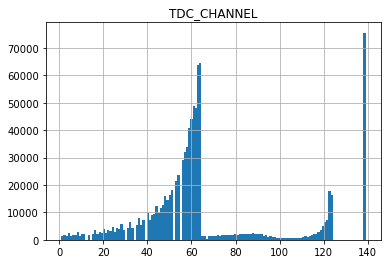

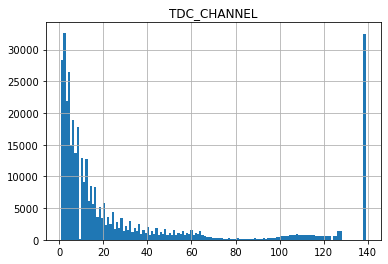

In [25]:
#7: OCCUPANCY PLOT
fpga1 = data[data['FPGA']==0]
fpga2 = data[data['FPGA']==1]

fpga1.hist('TDC_CHANNEL', bins=139)
fpga2.hist('TDC_CHANNEL', bins=139)

In [9]:
#8: FINDING TOP 3 NOISY CHANNELS
data.groupby('TDC_CHANNEL').sum().sort_values(by="HEAD", ascending=False)[:3]

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
TDC_CHANNEL,,,,,,
139,54353,32442,418102549486957,192477704,0,5.778252e+13
64,33098,1439,255444994368975,117767051,962195,3.557448e+13
63,32230,918,250113227630194,115482430,938192,3.478088e+13


In [23]:
#9: UNIQUE ORBITS
print('Unique orbits number:',len(x))

print('Orbit with channel 139:',len( data.groupby('TDC_CHANNEL').get_group(139).groupby('ORBIT_CNT') ))

Unique orbits number: 11001
Orbit with channel 139: 10976


<AxesSubplot:>

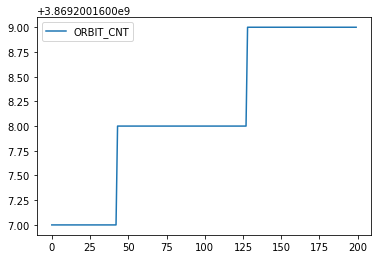

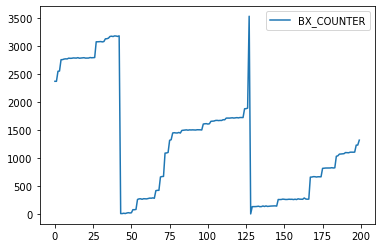

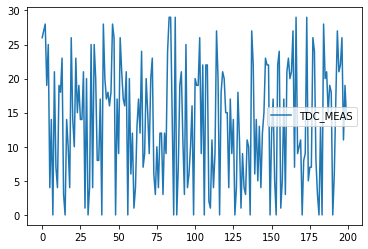

In [29]:


pdf1=pd.DataFrame(data[:200], index=data.index,columns=['ORBIT_CNT'])#, 'BX_COUNTER', 'TDC_MEAS'])
pdf2=pd.DataFrame(data[:200], index=data.index,columns=['BX_COUNTER'])#, 'TDC_MEAS'])
pdf3=pd.DataFrame(data[:200], index=data.index,columns=['TDC_MEAS'])
#plt.figure(); 
pdf1.plot()
pdf2.plot()
pdf3.plot()
#plt.legend(loc='best')